# **Climate Change Impact Prediction**

## **Import the Libraries**

In [6]:
import pandas as pd
import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Data Preprocessing**

### **Importing the Dataset**

In [7]:
path = '../data/Weather_Report.csv'
weather_data = pd.read_csv(path)

In [8]:
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [9]:
weather_data.shape

(100990, 20)

In [10]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [11]:
weather_data['datetime_utc'] = pd.to_datetime(weather_data['datetime_utc'])

In [12]:
weather_data['year'] = weather_data['datetime_utc'].dt.year
weather_data['month'] = weather_data['datetime_utc'].dt.month
weather_data['day'] = weather_data['datetime_utc'].dt.day

In [13]:
weather_data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm', 'year', 'month', 'day'],
      dtype='object')

In [14]:
weather_data[' _thunder'].unique()

array([0, 1], dtype=int64)

### **Handling missing values**

In [15]:
weather_data.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
year                 0
month                0
day                  0
dtype: int64

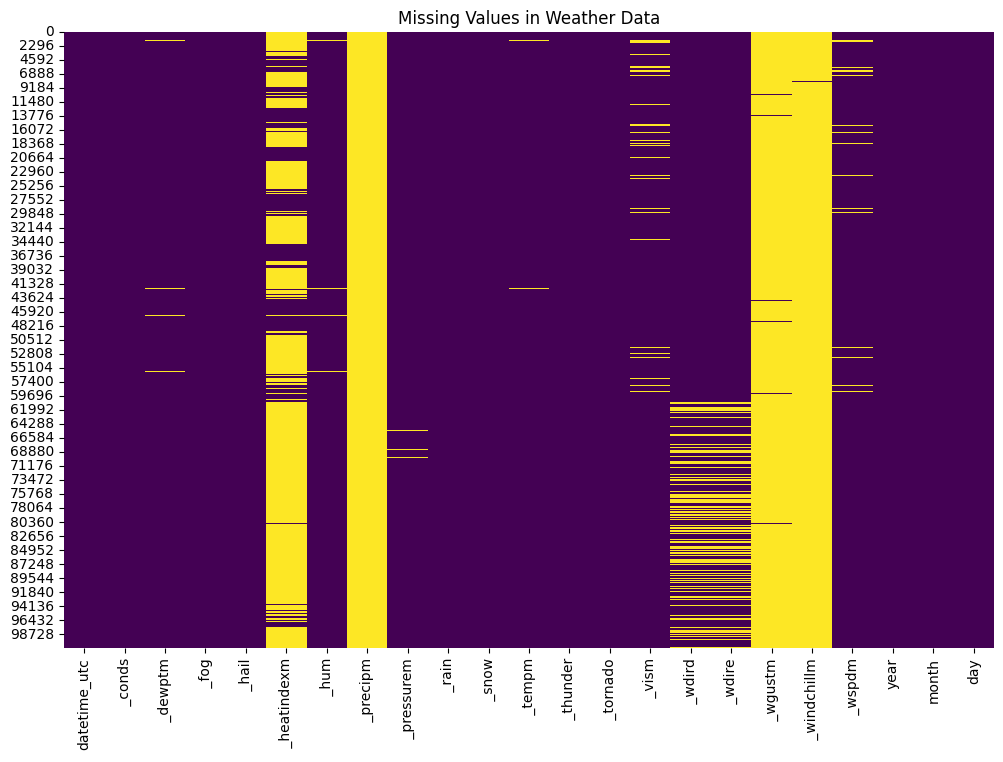

In [16]:
plt.figure(figsize=(12, 8))
sb.heatmap(weather_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data')
plt.show()

#### **Forward filling the null values**

In [17]:
weather_data.fillna(method='ffill', inplace=True)

In [18]:
weather_data[' _heatindexm'].fillna(weather_data[' _heatindexm'].mean(), inplace=True)

In [19]:
weather_data.isna().sum()

datetime_utc         0
 _conds              0
 _dewptm             0
 _fog                0
 _hail               0
 _heatindexm         0
 _hum                0
 _precipm       100990
 _pressurem          0
 _rain               0
 _snow               0
 _tempm              0
 _thunder            0
 _tornado            0
 _vism               0
 _wdird              0
 _wdire              0
 _wgustm          1665
 _windchillm       755
 _wspdm              0
year                 0
month                0
day                  0
dtype: int64

In [20]:
weather_data.drop(columns=['datetime_utc',' _precipm',' _vism', ' _wdird', ' _wdire',' _wgustm', ' _windchillm', ' _wspdm'], inplace=True)

In [21]:
weather_data

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,year,month,day
0,Smoke,9.0,0,0,31.99429,27.0,1010.0,0,0,30.0,0,0,1996,11,1
1,Smoke,10.0,0,0,31.99429,32.0,-9999.0,0,0,28.0,0,0,1996,11,1
2,Smoke,11.0,0,0,31.99429,44.0,-9999.0,0,0,24.0,0,0,1996,11,1
3,Smoke,10.0,0,0,31.99429,41.0,1010.0,0,0,24.0,0,0,1996,11,1
4,Smoke,11.0,0,0,31.99429,47.0,1011.0,0,0,23.0,0,0,1996,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,Haze,17.0,0,0,34.00000,25.0,1005.0,0,0,34.0,0,0,2017,4,24
100986,Haze,14.0,0,0,34.00000,16.0,1003.0,0,0,38.0,0,0,2017,4,24
100987,Haze,12.0,0,0,34.00000,14.0,1002.0,0,0,36.0,0,0,2017,4,24
100988,Haze,15.0,0,0,34.00000,27.0,1004.0,0,0,32.0,0,0,2017,4,24


In [22]:
# Function to create a impact with target values
def categorize_impact(row):
    if row[' _rain'] == 1:
        return 'rain'
    elif row[' _snow'] == 1:
        return 'snow'
    elif row[' _thunder'] == 1:
        return 'thunder'
    elif row[' _tornado'] == 1:
        return 'tornado'
    else:
        return 'no_impact'


In [23]:
weather_data['impact'] = weather_data.apply(categorize_impact, axis=1)

In [24]:
weather_data.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,year,month,day,impact
0,Smoke,9.0,0,0,31.99429,27.0,1010.0,0,0,30.0,0,0,1996,11,1,no_impact
1,Smoke,10.0,0,0,31.99429,32.0,-9999.0,0,0,28.0,0,0,1996,11,1,no_impact
2,Smoke,11.0,0,0,31.99429,44.0,-9999.0,0,0,24.0,0,0,1996,11,1,no_impact
3,Smoke,10.0,0,0,31.99429,41.0,1010.0,0,0,24.0,0,0,1996,11,1,no_impact
4,Smoke,11.0,0,0,31.99429,47.0,1011.0,0,0,23.0,0,0,1996,11,1,no_impact


In [25]:
weather_data['impact'].value_counts()

impact
no_impact    98067
rain          2652
thunder        268
tornado          2
snow             1
Name: count, dtype: int64

In [26]:
weather_data[weather_data['impact']=='rain']

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,year,month,day,impact
1656,Thunderstorms and Rain,10.0,0,0,27.0,94.0,1012.0,1,0,11.0,1,0,1997,1,19,rain
1657,Thunderstorms and Rain,11.0,0,0,27.0,100.0,-9999.0,1,0,11.0,1,0,1997,1,19,rain
1658,Thunderstorms and Rain,11.0,0,0,27.0,100.0,1012.0,1,0,11.0,1,0,1997,1,19,rain
1659,Thunderstorms and Rain,10.0,0,0,27.0,88.0,1013.0,1,0,12.0,1,0,1997,1,19,rain
1661,Rain,10.0,0,0,27.0,88.0,1012.0,1,0,12.0,0,0,1997,1,19,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100562,Light Drizzle,15.0,0,0,28.0,84.0,1007.0,1,0,16.0,0,0,2017,3,10,rain
100571,Thunderstorms and Rain,18.0,0,0,28.0,78.0,1005.0,1,0,22.0,1,0,2017,3,10,rain
100577,Thunderstorms and Rain,12.0,0,0,28.0,94.0,1009.0,1,0,13.0,1,0,2017,3,10,rain
100818,Thunderstorms and Rain,14.0,0,0,33.9,30.0,1009.0,1,0,28.0,1,0,2017,4,4,rain


In [27]:
weather_data.drop(columns=[' _conds',' _rain', ' _snow', ' _thunder', ' _tornado'], inplace=True)

In [28]:
weather_data.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_tempm,year,month,day,impact
0,9.0,0,0,31.99429,27.0,1010.0,30.0,1996,11,1,no_impact
1,10.0,0,0,31.99429,32.0,-9999.0,28.0,1996,11,1,no_impact
2,11.0,0,0,31.99429,44.0,-9999.0,24.0,1996,11,1,no_impact
3,10.0,0,0,31.99429,41.0,1010.0,24.0,1996,11,1,no_impact
4,11.0,0,0,31.99429,47.0,1011.0,23.0,1996,11,1,no_impact


## **Data Visualization**

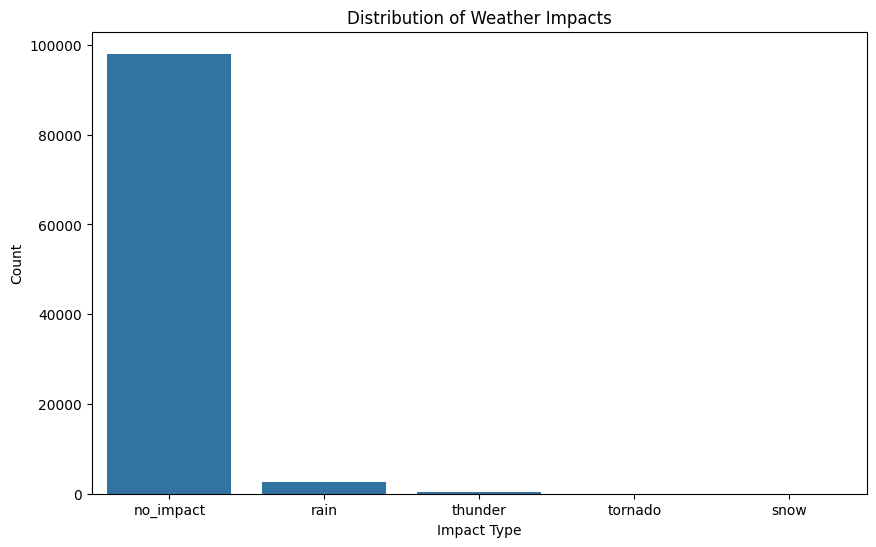

In [29]:
plt.figure(figsize=(10, 6))
sb.countplot(x='impact', data=weather_data)
plt.title('Distribution of Weather Impacts')
plt.xlabel('Impact Type')
plt.ylabel('Count')
plt.show()

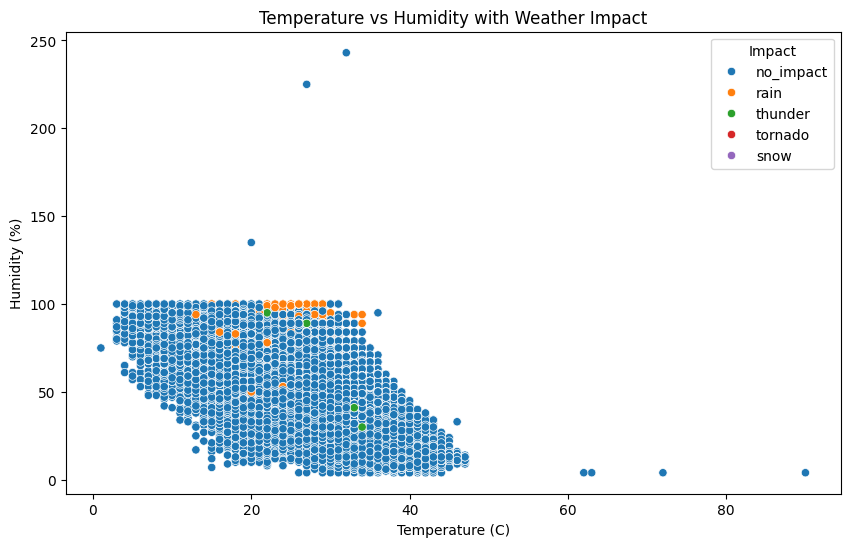

In [30]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=' _tempm', y=' _hum', hue='impact', data=weather_data)
plt.title('Temperature vs Humidity with Weather Impact')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Impact')
plt.show()

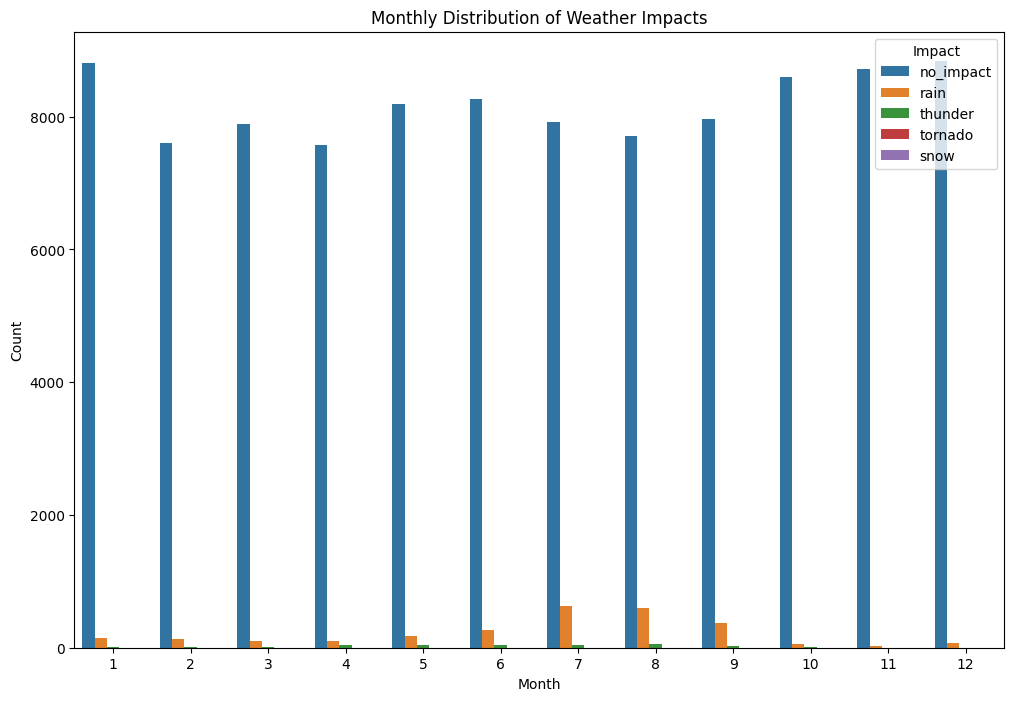

In [31]:
plt.figure(figsize=(12, 8))
sb.countplot(x='month', hue='impact', data=weather_data)
plt.title('Monthly Distribution of Weather Impacts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Impact')
plt.show()

### **Splitting the dataset into the Training set and Test set**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
X = weather_data.drop(columns=['impact'])
y = weather_data['impact']

In [34]:
X.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_tempm,year,month,day
0,9.0,0,0,31.99429,27.0,1010.0,30.0,1996,11,1
1,10.0,0,0,31.99429,32.0,-9999.0,28.0,1996,11,1
2,11.0,0,0,31.99429,44.0,-9999.0,24.0,1996,11,1
3,10.0,0,0,31.99429,41.0,1010.0,24.0,1996,11,1
4,11.0,0,0,31.99429,47.0,1011.0,23.0,1996,11,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

### **Training the RandomForestClassifier model on the whole dataset**

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_pred = model.predict(X_test)

### **Checking for Model Accuracy**

In [39]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9736216730038023

In [40]:
weather_data[weather_data['impact']=='thunder']

,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_tempm,year,month,day,impact
3051,17.0,0,0,27.5,73.0,1009.0,22.0,1997,4,1,thunder
3052,18.0,0,0,27.5,83.0,1009.0,21.0,1997,4,1,thunder
3071,20.0,0,0,27.5,94.0,1007.0,21.0,1997,4,2,thunder
3094,19.0,0,0,27.5,88.0,1010.0,21.0,1997,4,3,thunder
3139,15.0,0,0,27.5,68.0,1014.0,21.0,1997,4,5,thunder
...,...,...,...,...,...,...,...,...,...,...,...
96800,27.0,0,0,38.8,84.0,1002.0,30.0,2016,8,29,thunder
97514,25.0,0,0,30.6,89.0,1004.0,27.0,2016,10,4,thunder
100096,14.0,0,0,27.5,77.0,1018.0,18.0,2017,1,26,thunder
100970,18.0,0,0,42.1,30.0,1000.0,34.0,2017,4,22,thunder


### **Predicting a new result**

In [41]:
new = [[17.0, 0, 0, 27.5, 73.0, 1009.0, 22.0, 1997, 4, 1]]

In [42]:
model.predict(new)

array(['thunder'], dtype=object)

### **Saving the Model**

In [43]:
import joblib

In [44]:
joblib.dump(model, 'Climate_Change_Model.pkl')

['Climate_Change_Model.pkl']